## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 



In [8]:
batch_size = 64
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the train dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance V (1,0.01,0.1) to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9250177	total: 48.3ms	remaining: 48.3s
1:	learn: 0.9048570	total: 49.5ms	remaining: 24.7s
2:	learn: 0.8841227	total: 50.8ms	remaining: 16.9s
3:	learn: 0.8658500	total: 51.8ms	remaining: 12.9s
4:	learn: 0.8493524	total: 52.9ms	remaining: 10.5s
5:	learn: 0.8322447	total: 54ms	remaining: 8.95s
6:	learn: 0.8155797	total: 55.1ms	remaining: 7.81s
7:	learn: 0.7972763	total: 56.1ms	remaining: 6.95s
8:	learn: 0.7818638	total: 57ms	remaining: 6.28s
9:	learn: 0.7659418	total: 58ms	remaining: 5.74s
10:	learn: 0.7523650	total: 59.1ms	remaining: 5.32s
11:	learn: 0.7375006	total: 60.1ms	remaining: 4.95s
12:	learn: 0.7224148	total: 61.1ms	remaining: 4.64s
13:	learn: 0.7067166	total: 62.2ms	remaining: 4.38s
14:	learn: 0.6940702	total: 63.3ms	remaining: 4.16s
15:	learn: 0.6801655	total: 64.5ms	remaining: 3.96s
16:	learn: 0.6681934	total: 65.5ms	remaining: 3.79s
17:	learn: 0.6558113	total: 66.6ms	remaining: 3.63s
18:	learn: 0.6438345	total: 67.7ms	remaining: 3.5s


92:	learn: 0.3042929	total: 142ms	remaining: 1.38s
93:	learn: 0.3032571	total: 143ms	remaining: 1.38s
94:	learn: 0.3017430	total: 144ms	remaining: 1.37s
95:	learn: 0.3011073	total: 145ms	remaining: 1.37s
96:	learn: 0.3001259	total: 146ms	remaining: 1.36s
97:	learn: 0.2989729	total: 147ms	remaining: 1.35s
98:	learn: 0.2979415	total: 148ms	remaining: 1.35s
99:	learn: 0.2968332	total: 149ms	remaining: 1.34s
100:	learn: 0.2955142	total: 150ms	remaining: 1.34s
101:	learn: 0.2940855	total: 151ms	remaining: 1.33s
102:	learn: 0.2929247	total: 152ms	remaining: 1.33s
103:	learn: 0.2913552	total: 153ms	remaining: 1.32s
104:	learn: 0.2900613	total: 154ms	remaining: 1.31s
105:	learn: 0.2885801	total: 155ms	remaining: 1.31s
106:	learn: 0.2872639	total: 156ms	remaining: 1.3s
107:	learn: 0.2864804	total: 157ms	remaining: 1.3s
108:	learn: 0.2859036	total: 158ms	remaining: 1.29s
109:	learn: 0.2850953	total: 159ms	remaining: 1.29s
110:	learn: 0.2840937	total: 160ms	remaining: 1.28s
111:	learn: 0.2825914	

217:	learn: 0.2138943	total: 272ms	remaining: 975ms
218:	learn: 0.2135982	total: 273ms	remaining: 974ms
219:	learn: 0.2131671	total: 274ms	remaining: 972ms
220:	learn: 0.2126499	total: 275ms	remaining: 970ms
221:	learn: 0.2123038	total: 276ms	remaining: 968ms
222:	learn: 0.2117713	total: 277ms	remaining: 966ms
223:	learn: 0.2114096	total: 278ms	remaining: 965ms
224:	learn: 0.2108961	total: 279ms	remaining: 963ms
225:	learn: 0.2104821	total: 280ms	remaining: 960ms
226:	learn: 0.2097019	total: 281ms	remaining: 958ms
227:	learn: 0.2093413	total: 283ms	remaining: 957ms
228:	learn: 0.2087073	total: 284ms	remaining: 955ms
229:	learn: 0.2083624	total: 285ms	remaining: 953ms
230:	learn: 0.2079323	total: 286ms	remaining: 951ms
231:	learn: 0.2076251	total: 287ms	remaining: 949ms
232:	learn: 0.2069987	total: 288ms	remaining: 948ms
233:	learn: 0.2066494	total: 289ms	remaining: 946ms
234:	learn: 0.2059781	total: 290ms	remaining: 943ms
235:	learn: 0.2054482	total: 291ms	remaining: 941ms
236:	learn: 

350:	learn: 0.1594487	total: 407ms	remaining: 753ms
351:	learn: 0.1590216	total: 409ms	remaining: 753ms
352:	learn: 0.1586495	total: 410ms	remaining: 752ms
353:	learn: 0.1582442	total: 411ms	remaining: 751ms
354:	learn: 0.1579016	total: 412ms	remaining: 749ms
355:	learn: 0.1575577	total: 413ms	remaining: 748ms
356:	learn: 0.1571873	total: 414ms	remaining: 746ms
357:	learn: 0.1567343	total: 415ms	remaining: 745ms
358:	learn: 0.1563096	total: 417ms	remaining: 744ms
359:	learn: 0.1557928	total: 418ms	remaining: 742ms
360:	learn: 0.1553978	total: 419ms	remaining: 741ms
361:	learn: 0.1550211	total: 420ms	remaining: 740ms
362:	learn: 0.1548916	total: 421ms	remaining: 738ms
363:	learn: 0.1547554	total: 422ms	remaining: 737ms
364:	learn: 0.1544347	total: 423ms	remaining: 735ms
365:	learn: 0.1540954	total: 424ms	remaining: 734ms
366:	learn: 0.1536899	total: 425ms	remaining: 732ms
367:	learn: 0.1532650	total: 426ms	remaining: 731ms
368:	learn: 0.1527528	total: 427ms	remaining: 730ms
369:	learn: 

480:	learn: 0.1223027	total: 543ms	remaining: 586ms
481:	learn: 0.1220170	total: 545ms	remaining: 586ms
482:	learn: 0.1218744	total: 546ms	remaining: 584ms
483:	learn: 0.1216374	total: 547ms	remaining: 583ms
484:	learn: 0.1214864	total: 548ms	remaining: 582ms
485:	learn: 0.1211639	total: 549ms	remaining: 581ms
486:	learn: 0.1208457	total: 550ms	remaining: 580ms
487:	learn: 0.1206186	total: 551ms	remaining: 579ms
488:	learn: 0.1204006	total: 552ms	remaining: 577ms
489:	learn: 0.1200865	total: 554ms	remaining: 576ms
490:	learn: 0.1198608	total: 555ms	remaining: 575ms
491:	learn: 0.1196030	total: 556ms	remaining: 574ms
492:	learn: 0.1194238	total: 557ms	remaining: 572ms
493:	learn: 0.1192120	total: 557ms	remaining: 571ms
494:	learn: 0.1189446	total: 558ms	remaining: 570ms
495:	learn: 0.1187379	total: 559ms	remaining: 568ms
496:	learn: 0.1184795	total: 560ms	remaining: 567ms
497:	learn: 0.1184025	total: 561ms	remaining: 566ms
498:	learn: 0.1183474	total: 562ms	remaining: 565ms
499:	learn: 

607:	learn: 0.0979878	total: 679ms	remaining: 438ms
608:	learn: 0.0977845	total: 682ms	remaining: 438ms
609:	learn: 0.0977546	total: 683ms	remaining: 437ms
610:	learn: 0.0975287	total: 684ms	remaining: 436ms
611:	learn: 0.0973650	total: 685ms	remaining: 434ms
612:	learn: 0.0971304	total: 686ms	remaining: 433ms
613:	learn: 0.0969885	total: 687ms	remaining: 432ms
614:	learn: 0.0967960	total: 688ms	remaining: 431ms
615:	learn: 0.0965535	total: 689ms	remaining: 430ms
616:	learn: 0.0963718	total: 690ms	remaining: 429ms
617:	learn: 0.0961765	total: 691ms	remaining: 427ms
618:	learn: 0.0959150	total: 692ms	remaining: 426ms
619:	learn: 0.0957771	total: 694ms	remaining: 425ms
620:	learn: 0.0957000	total: 695ms	remaining: 424ms
621:	learn: 0.0954874	total: 696ms	remaining: 423ms
622:	learn: 0.0952150	total: 697ms	remaining: 422ms
623:	learn: 0.0950991	total: 698ms	remaining: 420ms
624:	learn: 0.0949602	total: 699ms	remaining: 419ms
625:	learn: 0.0947741	total: 700ms	remaining: 418ms
626:	learn: 

729:	learn: 0.0813461	total: 810ms	remaining: 300ms
730:	learn: 0.0812925	total: 811ms	remaining: 298ms
731:	learn: 0.0811670	total: 812ms	remaining: 297ms
732:	learn: 0.0811454	total: 813ms	remaining: 296ms
733:	learn: 0.0809245	total: 814ms	remaining: 295ms
734:	learn: 0.0808096	total: 815ms	remaining: 294ms
735:	learn: 0.0807873	total: 816ms	remaining: 293ms
736:	learn: 0.0805851	total: 817ms	remaining: 292ms
737:	learn: 0.0804325	total: 818ms	remaining: 290ms
738:	learn: 0.0803056	total: 819ms	remaining: 289ms
739:	learn: 0.0801736	total: 820ms	remaining: 288ms
740:	learn: 0.0801529	total: 821ms	remaining: 287ms
741:	learn: 0.0800819	total: 822ms	remaining: 286ms
742:	learn: 0.0799905	total: 823ms	remaining: 285ms
743:	learn: 0.0799066	total: 824ms	remaining: 283ms
744:	learn: 0.0798155	total: 825ms	remaining: 282ms
745:	learn: 0.0797348	total: 826ms	remaining: 281ms
746:	learn: 0.0795794	total: 827ms	remaining: 280ms
747:	learn: 0.0794442	total: 828ms	remaining: 279ms
748:	learn: 

854:	learn: 0.0688163	total: 945ms	remaining: 160ms
855:	learn: 0.0687533	total: 946ms	remaining: 159ms
856:	learn: 0.0686203	total: 947ms	remaining: 158ms
857:	learn: 0.0685804	total: 948ms	remaining: 157ms
858:	learn: 0.0684505	total: 949ms	remaining: 156ms
859:	learn: 0.0683953	total: 951ms	remaining: 155ms
860:	learn: 0.0682633	total: 952ms	remaining: 154ms
861:	learn: 0.0680777	total: 953ms	remaining: 153ms
862:	learn: 0.0679344	total: 954ms	remaining: 151ms
863:	learn: 0.0677470	total: 955ms	remaining: 150ms
864:	learn: 0.0676569	total: 956ms	remaining: 149ms
865:	learn: 0.0675263	total: 957ms	remaining: 148ms
866:	learn: 0.0675042	total: 958ms	remaining: 147ms
867:	learn: 0.0674075	total: 959ms	remaining: 146ms
868:	learn: 0.0673643	total: 961ms	remaining: 145ms
869:	learn: 0.0672511	total: 962ms	remaining: 144ms
870:	learn: 0.0671882	total: 963ms	remaining: 143ms
871:	learn: 0.0671217	total: 964ms	remaining: 141ms
872:	learn: 0.0670729	total: 965ms	remaining: 140ms
873:	learn: 

972:	learn: 0.0589618	total: 1.08s	remaining: 29.9ms
973:	learn: 0.0589481	total: 1.08s	remaining: 28.8ms
974:	learn: 0.0587983	total: 1.08s	remaining: 27.7ms
975:	learn: 0.0587834	total: 1.08s	remaining: 26.6ms
976:	learn: 0.0587749	total: 1.08s	remaining: 25.5ms
977:	learn: 0.0586698	total: 1.08s	remaining: 24.4ms
978:	learn: 0.0586611	total: 1.08s	remaining: 23.3ms
979:	learn: 0.0585021	total: 1.08s	remaining: 22.1ms
980:	learn: 0.0584217	total: 1.09s	remaining: 21ms
981:	learn: 0.0583166	total: 1.09s	remaining: 19.9ms
982:	learn: 0.0582397	total: 1.09s	remaining: 18.8ms
983:	learn: 0.0581709	total: 1.09s	remaining: 17.7ms
984:	learn: 0.0581629	total: 1.09s	remaining: 16.6ms
985:	learn: 0.0580084	total: 1.09s	remaining: 15.5ms
986:	learn: 0.0579173	total: 1.09s	remaining: 14.4ms
987:	learn: 0.0577934	total: 1.09s	remaining: 13.3ms
988:	learn: 0.0576921	total: 1.09s	remaining: 12.2ms
989:	learn: 0.0576767	total: 1.09s	remaining: 11.1ms
990:	learn: 0.0576234	total: 1.1s	remaining: 9.9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

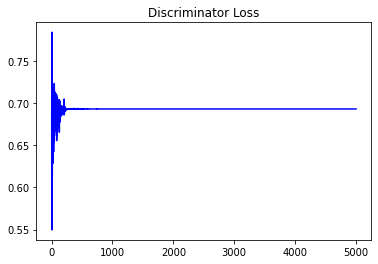

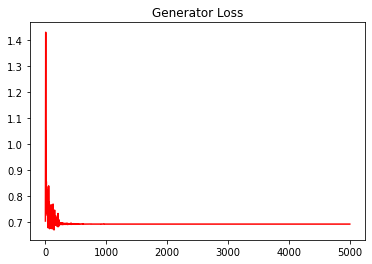

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

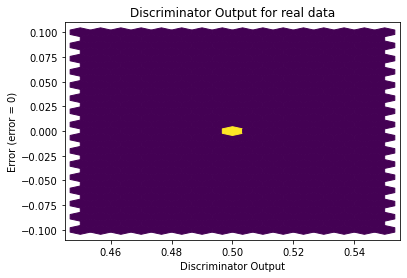

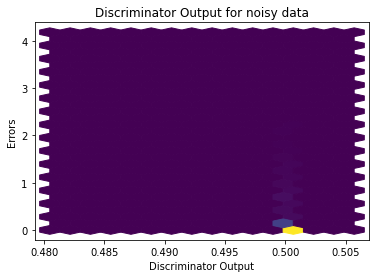

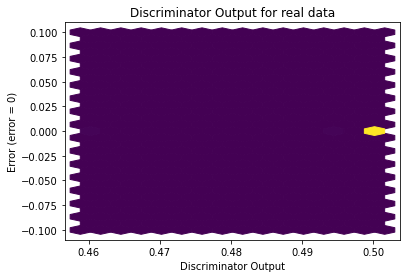

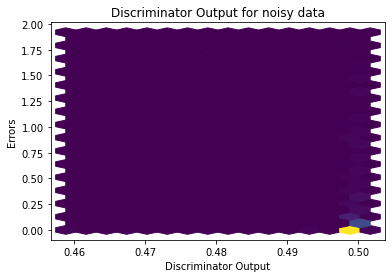

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


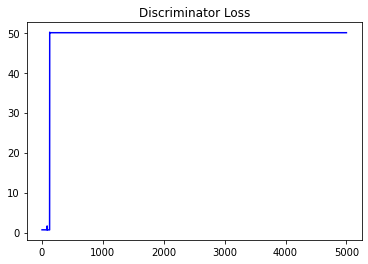

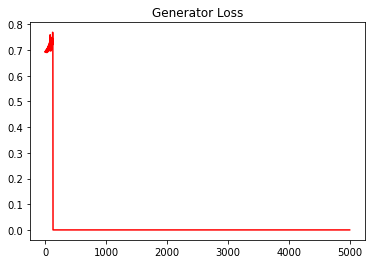

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)


In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

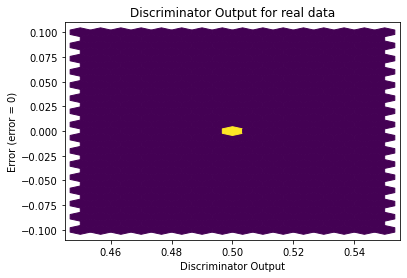

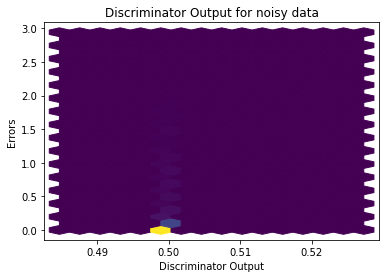

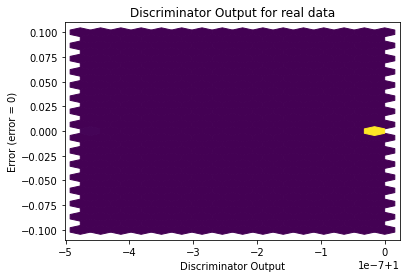

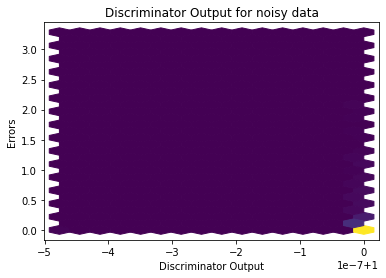

In [18]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0968]], device='cuda:0', requires_grad=True)
